Importando a biblioteca pandas e numpy para a análise de dados e a matplotlib para geração de gráficos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando o DataSet "Games", o qual contém dados sobre diversos jogos da NBA

In [16]:
url = "https://drive.google.com/file/d/1mJJDJDJuYk7FfbrnWr9m53Kc_PUfj4Pk/view?usp=share_link"

games = pd.read_csv("/content/games.csv")

Vendo os nomes das colunas

In [17]:
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.665100e+04,2.665100e+04,2.665100e+04,26651.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,2.665100e+04,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26552.000000,26651.000000
mean,2.175487e+07,1.610613e+09,1.610613e+09,2012.113879,1.610613e+09,103.455898,0.460735,0.760377,0.356023,22.823441,43.374284,1.610613e+09,100.639876,0.449732,0.758816,0.349489,21.496271,42.113249,0.587032
std,5.570189e+06,8.638670e+00,8.659299e+00,5.587031,8.638670e+00,13.283370,0.056676,0.100677,0.111164,5.193308,6.625769,8.659299e+00,13.435868,0.055551,0.103429,0.109441,5.160596,6.533039,0.492376
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.143000,0.000000,4.000000,19.000000,0.000000
25%,2.070001e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.422000,0.697000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.412000,0.692000,0.278000,18.000000,38.000000,0.000000
50%,2.120076e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,103.000000,0.460000,0.765000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,2.180005e+07,1.610613e+09,1.610613e+09,2017.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,110.000000,0.487000,0.833000,0.419000,25.000000,46.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


Eliminando as colunas desnecessárias para nossa análise. Nesse caso, analisaremos apenas as estatísticas do time da casa, com exceção da relação entre rebotes do time da casa e pontos cedidos ao adversário.



In [18]:
games.drop(['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'GAME_DATE_EST', 'GAME_DATE_EST', 'GAME_STATUS_TEXT', 'SEASON', 'TEAM_ID_home',
            'FT_PCT_home', 'FG3_PCT_home', 'TEAM_ID_away', 'FG_PCT_away',  'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
            'REB_away', 'HOME_TEAM_WINS'], axis=1)

,PTS_home,FG_PCT_home,AST_home,REB_home,PTS_away
0,126.0,0.484,25.0,46.0,117.0
1,120.0,0.488,16.0,40.0,112.0
2,114.0,0.482,22.0,37.0,106.0
3,113.0,0.441,27.0,49.0,93.0
4,108.0,0.429,22.0,47.0,110.0
...,...,...,...,...,...
26646,93.0,0.419,24.0,50.0,87.0
26647,81.0,0.338,18.0,40.0,85.0
26648,98.0,0.448,29.0,45.0,95.0
26649,99.0,0.440,21.0,30.0,94.0


Calculando 4 correlações diferentes:

In [19]:
#Correlação entre pontos marcados e aproveitamento nos arremessos
cor_pts_fg = games['PTS_home'].corr(games['FG_PCT_home'])

#Correlação entre rebotes do time da casa e pontos cedidos ao adversário
cor_reb_ptsad = games['REB_home'].corr(games['PTS_away'])

#Correlação entre número de assistências e aproveitamento nos arremessos
cor_ast_fg = games['AST_home'].corr(games['FG_PCT_home'])

#Correlação entre o número de pontos marcados e o número de assitências
cor_ast_pts = games['PTS_home'].corr(games['AST_home'])

Criando uma tabela com os valores de correlação.



*   PTS_FG - Correlação entre pontos marcados e aproveitamento nos arremessos;

*  REB_PTSAD - Correlação entre rebotes do time da casa e pontos cedidos ao adversário;


*   AST_FG - Correlação entre número de assistências e aproveitamento nos arremessos;

*   AST_PTS - Correlação entre assistências e pontos marcados.da listam da lista








In [21]:
nome = ['PTS_FG', 'REB_PTSAD', 'AST_FG', 'AST_PTS']
valor = [cor_pts_fg, cor_reb_ptsad, cor_ast_fg, cor_ast_pts]

df = pd.DataFrame(list(zip(nome,valor)), columns = ['Correlação Analisada', 'Valor Correlação'])

df

,Correlação Analisada,Valor Correlação
0,PTS_FG,0.662165
1,REB_PTSAD,-0.151297
2,AST_FG,0.550769
3,AST_PTS,0.605409


Vamos ordenar essa lista de acordo com a correlação em ordem Descrescente.

In [22]:
df.reset_index()
df.sort_values(by =['Valor Correlação'], ascending = False)

,Correlação Analisada,Valor Correlação
0,PTS_FG,0.662165
3,AST_PTS,0.605409
2,AST_FG,0.550769
1,REB_PTSAD,-0.151297


Vemos por essa tabela que a correlação mais forte é a de Pontos marcados com aproveitamento de arremessos. Em seguida, vemos que a correlação entre assistências e pontos marcadas é moderada, assim como a correlação entre assistências e aproveitamento de arremessos. Por fim, vemos uma correlação negativa entre rebotes e pontos cedidos, o que significa que quanto mais rebotes o time da casa consegue, menos pontos o adversário faz. Entretanto, essa correlação é estatisticamente inexistente (de apenas -0,15).

Agora, vamos criar um gráfico da correlação para a correlação mais forte.

Gráfico de Pontos/Aproveitamento.

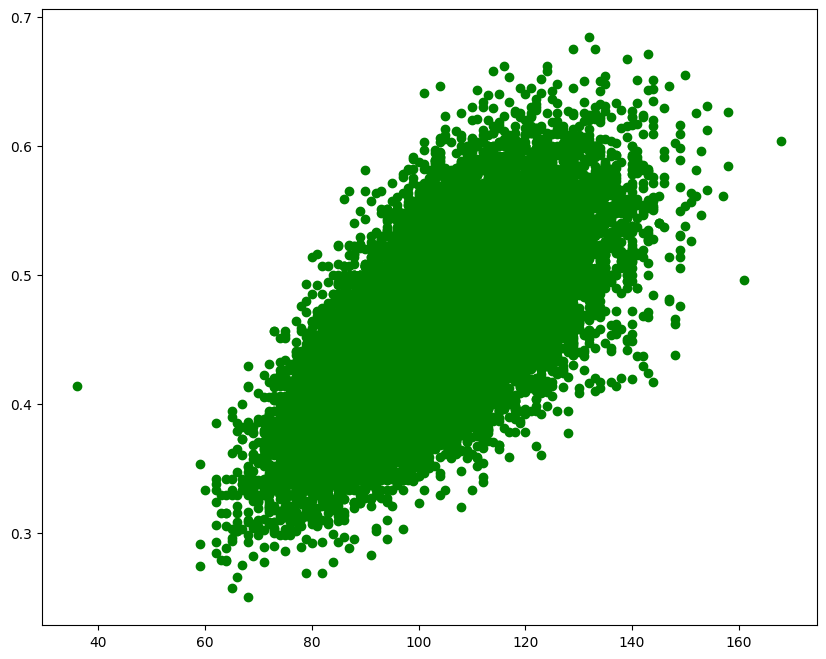

In [23]:
plt.figure(figsize=(10,8))

plt.scatter(games['PTS_home'],games['FG_PCT_home'], color = 'green')


Analisando esse gráfico, vemos uma leve tendência de um crescimento linear. Entretanto, os dados são muito dispersos, o que nos leva a crer que não há uma relação evidente e direta entre o número de pontos de um time e o aproveitamento nos arremessos.